In [79]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import os 

print(torch.cuda.is_available())
print(torch.__version__)

# ref)https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# ref)https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html

True
1.11.0


In [80]:
# load dataset from torch.utils.data import Dataset

training_data = datasets.FashionMNIST(root="~/dataset/MnistFashion", train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root="~/dataset/MnistFashion", train=False, download=True, transform=ToTensor())

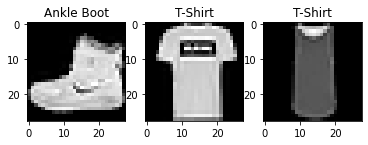

In [81]:
# visualize image

labels_map = {0: "T-Shirt",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot",}
i = 3

for idx in range(i):
    image, label = training_data[idx]
    plt.subplot(1, i, idx + 1)
    plt.title(labels_map[label])
    plt.imshow(image[0], cmap="gray")
plt.show()

In [82]:
training_data = np.array(training_data)
test_data  = np.array(test_data)

training_image, training_label = training_data.T
test_image, test_data = test_data.T

/tmp/ipykernel_519725/1477385736.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  training_data = np.array(training_data)
/tmp/ipykernel_519725/1477385736.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)
/tmp/ipykernel_519725/1477385736.py:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing 

In [83]:
# create custom Dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_data, label_data, transform=None, target_transform=None):
        self.image_data = image_data
        self.label_data = label_data
        
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.image_data[idx]
        label = self.label_data[idx]
        
        return image, label        

In [84]:
train_loader = CustomImageDataset(training_image, training_label)
test_loader = CustomImageDataset(test_image, training_label)